In [51]:
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Load the dataset

data = pd.read_csv("train.csv")

# Display the first few rows of the dataset and its summary information
data.head()

,AccountAge,MonthlyCharges,TotalCharges,SubscriptionType,PaymentMethod,PaperlessBilling,ContentType,MultiDeviceAccess,DeviceRegistered,ViewingHoursPerWeek,...,ContentDownloadsPerMonth,GenrePreference,UserRating,SupportTicketsPerMonth,Gender,WatchlistSize,ParentalControl,SubtitlesEnabled,CustomerID,Churn
0,20,11.055215,221.104302,Premium,Mailed check,No,Both,No,Mobile,36.758104,...,10,Sci-Fi,2.176498,4,Male,3,No,No,CB6SXPNVZA,0
1,57,5.175208,294.986882,Basic,Credit card,Yes,Movies,No,Tablet,32.450568,...,18,Action,3.478632,8,Male,23,No,Yes,S7R2G87O09,0
2,73,12.106657,883.785952,Basic,Mailed check,Yes,Movies,No,Computer,7.395160,...,23,Fantasy,4.238824,6,Male,1,Yes,Yes,EASDC20BDT,0
3,32,7.263743,232.439774,Basic,Electronic check,No,TV Shows,No,Tablet,27.960389,...,30,Drama,4.276013,2,Male,24,Yes,Yes,NPF69NT69N,0
4,57,16.953078,966.325422,Premium,Electronic check,Yes,TV Shows,No,TV,20.083397,...,20,Comedy,3.616170,4,Female,0,No,No,4LGYPK7VOL,0


In [52]:
# Categorical columns list
categorical_columns = data.select_dtypes(include=['object']).columns.drop('CustomerID') 
categorical_columns


Index(['SubscriptionType', 'PaymentMethod', 'PaperlessBilling', 'ContentType',
       'MultiDeviceAccess', 'DeviceRegistered', 'GenrePreference', 'Gender',
       'ParentalControl', 'SubtitlesEnabled'],
      dtype='object')

In [53]:
# Encoded the Categorical vars into dummies

one_hot_encoded_data = pd.get_dummies(data, columns = categorical_columns)
one_hot_encoded_data

one_hot_encoded_data=one_hot_encoded_data.drop(columns=numerical_columns)
one_hot_encoded_data=one_hot_encoded_data.drop(columns=['CustomerID'])
one_hot_encoded_data

,Churn,SubscriptionType_Basic,SubscriptionType_Premium,SubscriptionType_Standard,PaymentMethod_Bank transfer,PaymentMethod_Credit card,PaymentMethod_Electronic check,PaymentMethod_Mailed check,PaperlessBilling_No,PaperlessBilling_Yes,...,GenrePreference_Comedy,GenrePreference_Drama,GenrePreference_Fantasy,GenrePreference_Sci-Fi,Gender_Female,Gender_Male,ParentalControl_No,ParentalControl_Yes,SubtitlesEnabled_No,SubtitlesEnabled_Yes
0,0,False,True,False,False,False,False,True,True,False,...,False,False,False,True,False,True,True,False,True,False
1,0,True,False,False,False,True,False,False,False,True,...,False,False,False,False,False,True,True,False,False,True
2,0,True,False,False,False,False,False,True,False,True,...,False,False,True,False,False,True,False,True,False,True
3,0,True,False,False,False,False,True,False,True,False,...,False,True,False,False,False,True,False,True,False,True
4,0,False,True,False,False,False,True,False,False,True,...,True,False,False,False,True,False,True,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
243782,0,True,False,False,False,False,False,True,True,False,...,False,False,False,True,False,True,False,True,True,False
243783,0,False,True,False,False,True,False,False,True,False,...,True,False,False,False,False,True,True,False,True,False
243784,0,False,True,False,False,True,False,False,False,True,...,False,False,False,False,False,True,False,True,False,True
243785,0,False,True,False,True,False,False,False,False,True,...,False,False,True,False,True,False,True,False,False,True


In [54]:
# Getting list of numerical vars

numerical_columns = data.select_dtypes(include=['int64', 'float64']).columns.drop('Churn')
numerical_columns

Index(['AccountAge', 'MonthlyCharges', 'TotalCharges', 'ViewingHoursPerWeek',
       'AverageViewingDuration', 'ContentDownloadsPerMonth', 'UserRating',
       'SupportTicketsPerMonth', 'WatchlistSize'],
      dtype='object')

In [55]:
# Encoding the numerical vars into StandardScaler
scaler = StandardScaler()

# Fit and transform the data
scaled_features = scaler.fit_transform(data[numerical_columns])

# Convert the scaled data into a DataFrame
scaled_df = pd.DataFrame(scaled_features, columns=numerical_columns)
scaled_df

,AccountAge,MonthlyCharges,TotalCharges,ViewingHoursPerWeek,AverageViewingDuration,ContentDownloadsPerMonth,UserRating,SupportTicketsPerMonth,WatchlistSize
0,-1.169131,-0.331703,-1.012550,1.445777,-0.568906,-1.005712,-0.715179,-0.175519,-1.253786
1,-0.089945,-1.690423,-0.871303,1.062671,-1.317459,-0.450971,0.411960,1.216976,1.526687
2,0.376731,-0.088741,0.254353,-1.165718,-0.691019,-0.104258,1.069988,0.520728,-1.531833
3,-0.819125,-1.207816,-0.990879,0.663322,0.777613,0.381141,1.102179,-0.871766,1.665711
4,-0.089945,1.031143,0.412150,-0.037246,-0.928765,-0.312285,0.531014,-0.175519,-1.670857
...,...,...,...,...,...,...,...,...,...
243782,0.493400,-0.658746,-0.016190,-0.622520,-0.235555,1.559965,0.601371,-1.219890,-0.558668
243783,1.660088,0.129070,1.483585,0.396764,-0.642422,0.727854,-1.344265,-0.175519,1.109616
243784,1.543419,0.467666,1.700349,-0.878129,1.661653,1.351938,0.873836,0.520728,0.136451
243785,-1.548305,1.305539,-1.192488,0.886236,1.210218,0.797197,-0.750417,0.868852,-0.975739


In [56]:
result_df = pd.concat([one_hot_encoded_data, scaled_df], axis=1)

result_df

,Churn,SubscriptionType_Basic,SubscriptionType_Premium,SubscriptionType_Standard,PaymentMethod_Bank transfer,PaymentMethod_Credit card,PaymentMethod_Electronic check,PaymentMethod_Mailed check,PaperlessBilling_No,PaperlessBilling_Yes,...,SubtitlesEnabled_Yes,AccountAge,MonthlyCharges,TotalCharges,ViewingHoursPerWeek,AverageViewingDuration,ContentDownloadsPerMonth,UserRating,SupportTicketsPerMonth,WatchlistSize
0,0,False,True,False,False,False,False,True,True,False,...,False,-1.169131,-0.331703,-1.012550,1.445777,-0.568906,-1.005712,-0.715179,-0.175519,-1.253786
1,0,True,False,False,False,True,False,False,False,True,...,True,-0.089945,-1.690423,-0.871303,1.062671,-1.317459,-0.450971,0.411960,1.216976,1.526687
2,0,True,False,False,False,False,False,True,False,True,...,True,0.376731,-0.088741,0.254353,-1.165718,-0.691019,-0.104258,1.069988,0.520728,-1.531833
3,0,True,False,False,False,False,True,False,True,False,...,True,-0.819125,-1.207816,-0.990879,0.663322,0.777613,0.381141,1.102179,-0.871766,1.665711
4,0,False,True,False,False,False,True,False,False,True,...,False,-0.089945,1.031143,0.412150,-0.037246,-0.928765,-0.312285,0.531014,-0.175519,-1.670857
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
243782,0,True,False,False,False,False,False,True,True,False,...,False,0.493400,-0.658746,-0.016190,-0.622520,-0.235555,1.559965,0.601371,-1.219890,-0.558668
243783,0,False,True,False,False,True,False,False,True,False,...,False,1.660088,0.129070,1.483585,0.396764,-0.642422,0.727854,-1.344265,-0.175519,1.109616
243784,0,False,True,False,False,True,False,False,False,True,...,True,1.543419,0.467666,1.700349,-0.878129,1.661653,1.351938,0.873836,0.520728,0.136451
243785,0,False,True,False,True,False,False,False,False,True,...,True,-1.548305,1.305539,-1.192488,0.886236,1.210218,0.797197,-0.750417,0.868852,-0.975739


In [57]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt


# Splitting data into training and testing sets
X = result_df.drop(['Churn'], axis=1)
y = result_df['Churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)


# Setting the Logistic Regression model
model = LogisticRegression()

# Fit the model to the training data
model.fit(X_train, y_train)

# Predict the target variable for the test set
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Extract true positives, false positives, true negatives, and false negatives from the confusion matrix
TN, FP, FN, TP = conf_matrix.ravel()

# Calculate sensitivity (true positive rate)
sensitivity = TP / (TP + FN)

# Calculate specificity (true negative rate)
specificity = TN / (TN + FP)

print("Sensitivity:", sensitivity)
print("Specificity:", specificity)


Accuracy: 0.8238629954365995
Sensitivity: 0.11637393767705383
Specificity: 0.9802166155387216


In [58]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt


# Splitting data into training and testing sets
X = result_df.drop(['Churn'], axis=1)
y = result_df['Churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=32)


# Setting up the Logistic Regression model
model = LogisticRegression()

# Fit the model to the training data
model.fit(X_train, y_train)

# Get the coefficients (importance) of each feature
feature_importance = model.coef_[0]
 
# Create a dictionary to map feature names to their importance scores
feature_importance_dict = dict(zip(X.columns, abs(feature_importance)))

# Sort the features based on their importance scores
important_features = sorted(feature_importance_dict.items(), key=lambda x: x[1], reverse=True)

# Print the top 10 most important features
print("Top 10 most important features:")
for feature, importance in important_features[:10]:
    print(f"{feature}: {importance}")

# Predict the target variable for the test set
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Extract true positives, false positives, true negatives, and false negatives from the confusion matrix
TN, FP, FN, TP = conf_matrix.ravel()

# Calculate sensitivity (true positive rate)
sensitivity = TP / (TP + FN)

# Calculate specificity (true negative rate)
specificity = TN / (TN + FP)

print("Sensitivity:", sensitivity)
print("Specificity:", specificity)


Top 10 most important features:
AccountAge: 0.6104013190189139
AverageViewingDuration: 0.44434031339721974
ContentDownloadsPerMonth: 0.3878538360787526
ViewingHoursPerWeek: 0.3742410689243876
MonthlyCharges: 0.28967441820956213
SubscriptionType_Premium: 0.26091880632293896
SupportTicketsPerMonth: 0.24917441101043522
PaymentMethod_Credit card: 0.23634514996107817
SubtitlesEnabled_Yes: 0.21206034321836495
ParentalControl_Yes: 0.20732460400097527
Accuracy: 0.8224975046829922
Sensitivity: 0.11500596658711217
Specificity: 0.9813156088332301


In [73]:
feature_importance

array([ 8.21845767e-04, -2.66274824e-01, -1.03695674e-01, -1.05419911e-01,
       -2.44173615e-01, -9.22508600e-05, -1.94628759e-02, -1.90448382e-01,
       -1.78700270e-01, -6.36268805e-02, -1.53251650e-01, -1.52270122e-01,
       -1.78724183e-01, -1.90424469e-01, -8.64526064e-02, -8.30141327e-02,
       -1.14355476e-01, -8.53264372e-02, -2.01590820e-01,  1.55449594e-02,
       -7.80314415e-02, -1.07018312e-01,  1.94696266e-03, -2.01335485e-01,
       -1.67813167e-01, -1.67611929e-01, -2.01536723e-01, -1.51867209e-01,
       -2.17281443e-01, -5.97901290e-01,  2.91672428e-01,  9.89301684e-03,
       -3.79301305e-01, -4.40657568e-01, -3.85969594e-01,  6.10594386e-02,
        2.50545637e-01,  6.02605164e-02])

In [59]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt

# Splitting data into training and testing sets
X = result_df.drop(['Churn'], axis=1)
y = result_df['Churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Setting up the Logistic Regression model
model = LogisticRegression()

# Fit the model to the training data
model.fit(X_train, y_train)

# Get the coefficients (importance) of each feature
feature_importance = model.coef_[0]

# Create a dictionary to map feature names to their importance scores
feature_importance_dict = dict(zip(X.columns, abs(feature_importance)))

# Sort the features based on their importance scores
important_features = sorted(feature_importance_dict.items(), key=lambda x: x[1], reverse=True)

# Extract the top 10 most important features
top_features = [feature for feature, _ in important_features[:10]]

# Filter the training and testing data to include only the most important features
X_train_top = X_train[top_features]
X_test_top = X_test[top_features]

# Create a new Logistic Regression model using only the most important features
model_top = LogisticRegression()

# Fit the model to the training data with only the most important features
model_top.fit(X_train_top, y_train)

# Predict the target variable for the test set using the model with only the most important features
y_pred_top = model_top.predict(X_test_top)

# Calculate accuracy using only the most important features
accuracy_top = accuracy_score(y_test, y_pred_top)
print("Accuracy (using only the most important features):", accuracy_top)

# Calculate confusion matrix using only the most important features
conf_matrix_top = confusion_matrix(y_test, y_pred_top)

# Extract true positives, false positives, true negatives, and false negatives from the confusion matrix
TN_top, FP_top, FN_top, TP_top = conf_matrix_top.ravel()

# Calculate sensitivity (true positive rate) using only the most important features
sensitivity_top = TP_top / (TP_top + FN_top)

# Calculate specificity (true negative rate) using only the most important features
specificity_top = TN_top / (TN_top + FP_top)

print("Sensitivity (using only the most important features):", sensitivity_top)
print("Specificity (using only the most important features):", specificity_top)


Accuracy (using only the most important features): 0.8256081053365601
Sensitivity (using only the most important features): 0.11751990898748578
Specificity (using only the most important features): 0.9813350680544436


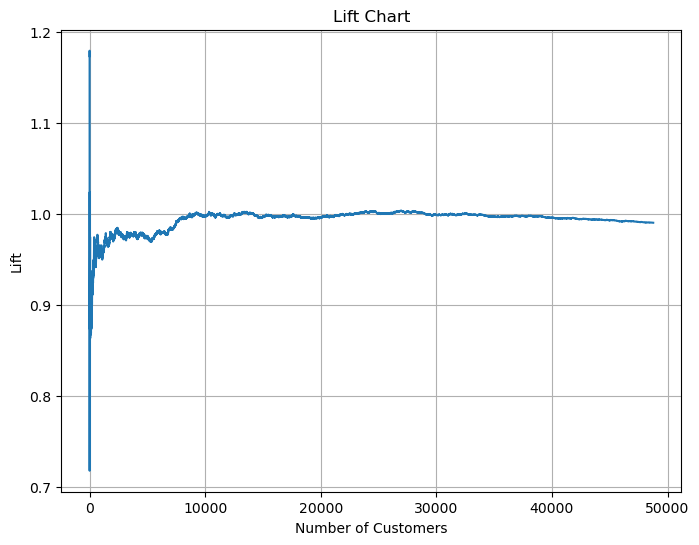

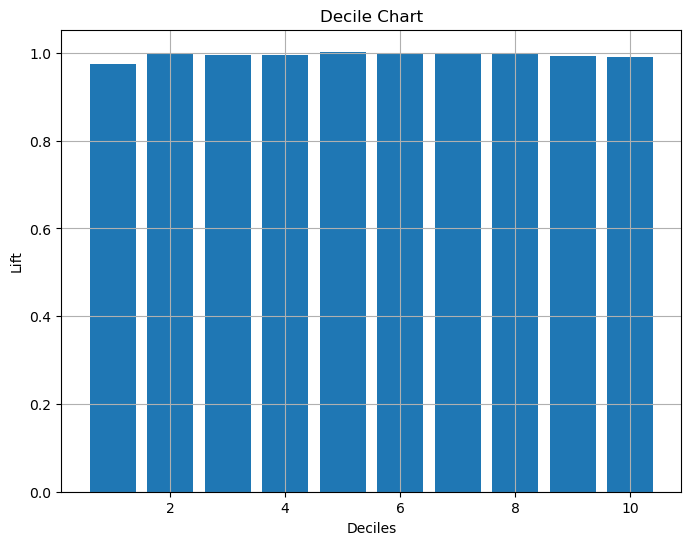

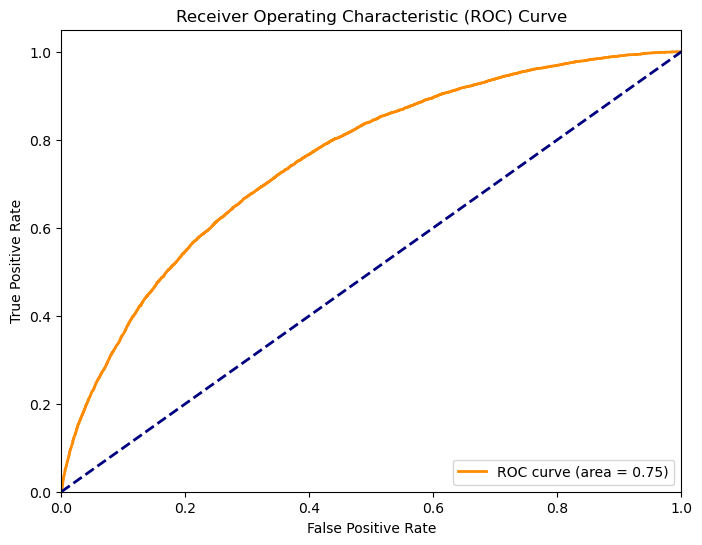

In [62]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Assuming 'y_probs' are the predicted probabilities for the positive class from your model
# and 'y_test' are the true labels from the test set.

# Sort the indices based on predicted probabilities
sorted_indices = np.argsort(y_probs)[::-1]
y_test_sorted = y_test.iloc[sorted_indices].reset_index(drop=True)
y_probs_sorted = y_probs[sorted_indices]

# Calculate cumulative sum of actual responses
cumulative_actuals = np.cumsum(y_test_sorted)

# Calculate cumulative sum of predicted probabilities
cumulative_predicted = np.cumsum(y_probs_sorted)

# Calculate lift values
lift_values = cumulative_actuals / cumulative_predicted

# Plot Lift Chart
plt.figure(figsize=(8, 6))
plt.plot(np.arange(1, len(lift_values) + 1), lift_values)
plt.xlabel('Number of Customers')
plt.ylabel('Lift')
plt.title('Lift Chart')
plt.grid(True)
plt.show()

# Decile Chart
total_customers = len(y_test_sorted)
deciles = [int(total_customers * i / 10) for i in range(1, 11)]
decile_lifts = [lift_values[decile - 1] for decile in deciles]  # Adjust decile - 1 as per zero-based index
plt.figure(figsize=(8, 6))
plt.bar(range(1, 11), decile_lifts)
plt.xlabel('Deciles')
plt.ylabel('Lift')
plt.title('Decile Chart')
plt.grid(True)
plt.show()

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()



In [70]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

# Assuming 'result_df' is your DataFrame and 'Churn' is the target column

# Splitting data into training and testing sets
X = result_df.drop(['Churn'], axis=1)
y = result_df['Churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert X_train and y_train to DataFrame for easier manipulation
train_df = pd.concat([X_train, y_train], axis=1)

# Separating the majority and minority classes
majority_class = train_df[train_df.Churn == 0]
minority_class = train_df[train_df.Churn == 1]

# Oversample the minority class
minority_oversampled = minority_class.sample(n=len(majority_class), replace=True, random_state=42)

# Combine the oversampled minority class with the majority class
oversampled_train_df = pd.concat([majority_class, minority_oversampled], axis=0)

# Shuffle the dataset to prevent the model from learning any order
oversampled_train_df = oversampled_train_df.sample(frac=1, random_state=42)

# Splitting the oversampled DataFrame back into X and y
X_train_oversampled = oversampled_train_df.drop(['Churn'], axis=1)
y_train_oversampled = oversampled_train_df['Churn']

# Fit Logistic Regression model
model = LogisticRegression()
model.fit(X_train_oversampled, y_train_oversampled)

# Predict on the test set
y_pred = model.predict(X_test)

# Calculate accuracy and confusion matrix
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
TN, FP, FN, TP = conf_matrix.ravel()

# Calculate sensitivity (true positive rate) and specificity (true negative rate)
sensitivity = TP / (TP + FN)
specificity = TN / (TN + FP)

print("Accuracy:", accuracy)
print("Sensitivity:", sensitivity)
print("Specificity:", specificity)




Accuracy: 0.6788014274580582
Sensitivity: 0.6957906712172923
Specificity: 0.6750650520416333


Accuracy: 0.6778374830796997
Sensitivity: 0.6964732650739477
Specificity: 0.6737389911929543


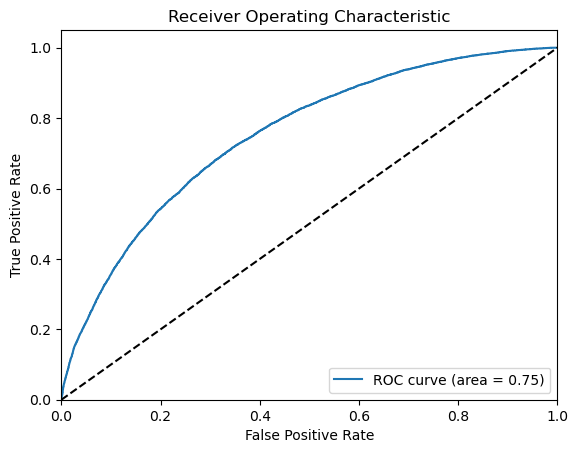

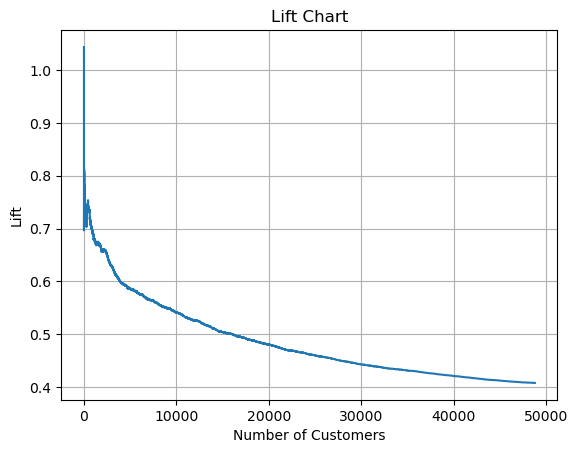

In [71]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import numpy as np

# Assuming 'result_df' is your DataFrame and 'Churn' is the target column

# Define significant columns
significant_columns = ['AccountAge','AverageViewingDuration','ContentDownloadsPerMonth','ViewingHoursPerWeek','MonthlyCharges',
                       'SubscriptionType_Premium','SupportTicketsPerMonth','PaymentMethod_Credit card','SubtitlesEnabled_Yes','ParentalControl_Yes']

# Splitting data into training and testing sets using only significant columns
X = result_df[significant_columns]
y = result_df['Churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert X_train and y_train to DataFrame for easier manipulation
train_df = pd.concat([X_train, y_train], axis=1)

# Separating the majority and minority classes
majority_class = train_df[train_df.Churn == 0]
minority_class = train_df[train_df.Churn == 1]

# Oversample the minority class
minority_oversampled = minority_class.sample(n=len(majority_class), replace=True, random_state=42)

# Combine the oversampled minority class with the majority class
oversampled_train_df = pd.concat([majority_class, minority_oversampled], axis=0)

# Shuffle the dataset to prevent the model from learning any order
oversampled_train_df = oversampled_train_df.sample(frac=1, random_state=42)

# Splitting the oversampled DataFrame back into X and y
X_train_oversampled = oversampled_train_df[significant_columns]
y_train_oversampled = oversampled_train_df['Churn']

# Fit Logistic Regression model
model = LogisticRegression()
model.fit(X_train_oversampled, y_train_oversampled)

# Predict on the test set
y_pred = model.predict(X_test)

# Calculate accuracy and confusion matrix
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
TN, FP, FN, TP = conf_matrix.ravel()

# Calculate sensitivity (true positive rate) and specificity (true negative rate)
sensitivity = TP / (TP + FN)
specificity = TN / (TN + FP)

# Print results
print("Accuracy:", accuracy)
print("Sensitivity:", sensitivity)
print("Specificity:", specificity)

# Calculate predicted probabilities for ROC curve
y_probs = model.predict_proba(X_test)[:, 1]

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# Lift Chart
sorted_indices = np.argsort(y_probs)[::-1]
y_test_sorted = y_test.iloc[sorted_indices]
y_probs_sorted = y_probs[sorted_indices]
cumulative_actuals = np.cumsum(y_test_sorted)
cumulative_predicted = np.cumsum(y_probs_sorted)
lift_values = cumulative_actuals / cumulative_predicted

plt.figure()
plt.plot(np.arange(1, len(lift_values) + 1), lift_values)
plt.xlabel('Number of Customers')
plt.ylabel('Lift')
plt.title('Lift Chart')
plt.grid(True)
plt.show()
